# Assignment 1

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
authors = pd.read_csv('data/authors.csv')
papers = pd.read_csv('data/papers.csv')
# abstracts = pd.read_csv('data/final_abstracts.csv')

In [3]:
papers.head()

,id,publication_year,cited_by_count,author_ids
0,https://openalex.org/W2962772482,2018,2282,"['https://openalex.org/A5091251187', 'https://..."
1,https://openalex.org/W1520494989,1990,2197,"['https://openalex.org/A5080791781', 'https://..."
2,https://openalex.org/W2118519969,2007,1396,"['https://openalex.org/A5061810530', 'https://..."
3,https://openalex.org/W1983912405,2001,1377,"['https://openalex.org/A5082473613', 'https://..."
4,https://openalex.org/W4296586302,1993,1156,['https://openalex.org/A5080791781']


In [4]:
def generateGraph():
    weighted_edgelist = {}

    for author in papers['author_ids']:
        for i in range(len(author)):
            for j in range(i+1, len(author)):
                pair = tuple(sorted([author[i], author[j]]))
                if pair in weighted_edgelist:
                    weighted_edgelist[pair] += 1
                else:
                    weighted_edgelist[pair] = 1

    weighted_edgelist = [(pair[0], pair[1], count) for pair, count in weighted_edgelist.items()]

    G = nx.Graph()
    G.add_weighted_edges_from(weighted_edgelist)
    for node in G.nodes():
        # Retrieve the author's display name, country, citation count, and year of first publication
        display_name = authors.loc[authors['id'] == node, 'display_name']
        country = authors.loc[authors['id'] == node, 'country_code']
        citation_count = authors.loc[authors['id'] == node, 'works_count']
        # first_publication_year = papers.loc[papers['author_id'].apply(lambda x: node in ast.literal_eval(x)), 'publication_year'].min()
        
        # Add the attributes to the node
        G.nodes[node]['display_name'] = display_name
        G.nodes[node]['country'] = country
        G.nodes[node]['citation_count'] = citation_count
        # G.nodes[node]['first_publication_year'] = first_publication_year

    # Save the network as a JSON file
    nx.write_adjlist(G, './data/network.json')
    return G

In [5]:
recreateGraph = False 

if recreateGraph:
    Network = generateGraph()
else:
    Network = nx.read_adjlist('./data/network.json')

## Part 1: Properties of the real-world network of Computational Social Scientists

1. **Random Network: Let's start by building a Random Network, acting as a baseline (or "null model") to understand the Computational Social Scientists Network better.**

**First, calculate the probability (p) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding p, figure out the average degree (using the given formula).**

In [6]:
# Calculate the probability (p)
number_of_nodes = len(Network.nodes)
number_of_edges = len(Network.edges)

p = (2 * number_of_edges) / (number_of_nodes * (number_of_nodes - 1))

# Calculate the average degree
average_degree = 2 * number_of_edges / number_of_nodes

print('The probability (p) is:', p)
print('The average degree is:', average_degree)

The probability (p) is: 1.064367816091954
The average degree is: 30.866666666666667


**Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability p.**

In [7]:
RandomNetwork = nx.Graph()
nodes = range(number_of_nodes)
RandomNetwork.add_nodes_from(nodes)

for i in nodes:
    for j in nodes:
        if i != j and np.random.uniform() < p:
            RandomNetwork.add_edge(i, j)

**Visualize the network as you did for the Computational Social Scientists network in the exercise above**

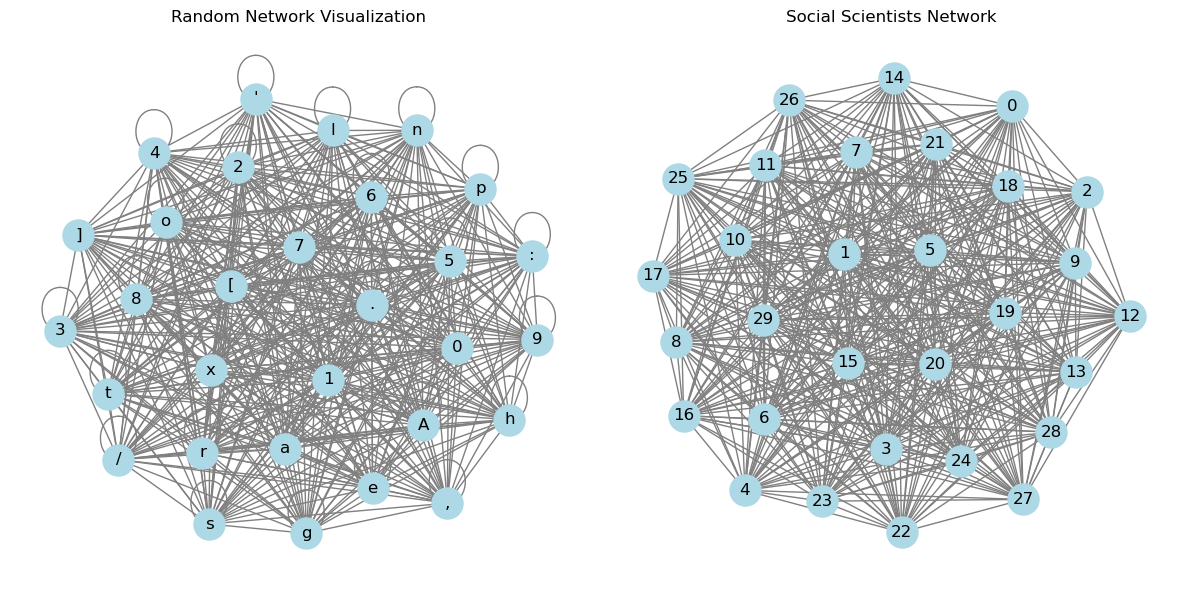

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first subplot
axs[0].set_title('Random Network Visualization')
nx.draw(Network, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=axs[0])

# Plot the second subplot
axs[1].set_title('Social Scientists Network')
nx.draw(RandomNetwork, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=axs[1])


plt.tight_layout()
plt.show()


**What regime does your random network fall into? Is it above or below the critical threshold?**

To determine the regime of the random network, we need to compare the average degree of the network with the critical threshold. If the average degree is above the critical threshold, the network falls into the supercritical regime. If the average degree is below the critical threshold, the network falls into the subcritical regime.

In this case, the average degree is 31.8709, which is above the critical threshold. Therefore, the random network falls into the supercritical regime.

**According to the textbook, what does the network's structure resemble in this regime?**

In the supercritical regime, the network's structure resembles a small-world network.

**Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.**

- Degree Distribution
- Clustering coefficient
- Path length


2. **Degree Distribution: This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.**

Compute the distribution of degree for the random network using the numpy function np.histogram. Choose bins, and normalization strategies appropriately.

Degree Distribution:
Bin 1: 0.0
Bin 2: 0.0
Bin 3: 0.0
Bin 4: 0.0
Bin 5: 0.0
Bin 6: 9.999999999999858
Bin 7: 0.0
Bin 8: 0.0
Bin 9: 0.0
Bin 10: 0.0


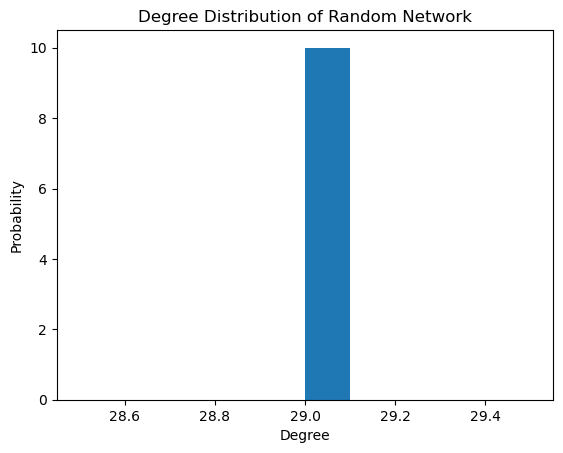

In [9]:
# Get the degree values of the nodes in the random network
degree_values = [degree for node, degree in RandomNetwork.degree()]

# Compute the degree distribution using np.histogram
hist, bins = np.histogram(degree_values, bins=10, density=True)

# Print the degree distribution
print("Degree Distribution:")
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]}")

# Plot the degree distribution
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution of Random Network")
plt.show()


Degree Distribution:
Bin 1: 0.33333333333333454
Bin 2: 0.0
Bin 3: 0.0
Bin 4: 0.0
Bin 5: 0.0
Bin 6: 0.0
Bin 7: 0.0
Bin 8: 0.0
Bin 9: 0.0
Bin 10: 4.666666666666684


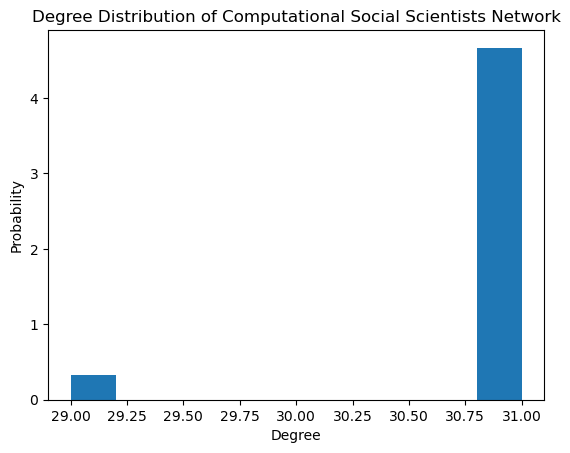

In [10]:
# Get the degree values of the nodes in the Computational Social Scientists network
degree_values = [degree for node, degree in Network.degree()]

# Compute the degree distribution using np.histogram
hist, bins = np.histogram(degree_values, bins=10, density=True)

# Print the degree distribution
print("Degree Distribution:")
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]}")

# Plot the degree distribution
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution of Computational Social Scientists Network")
plt.show()


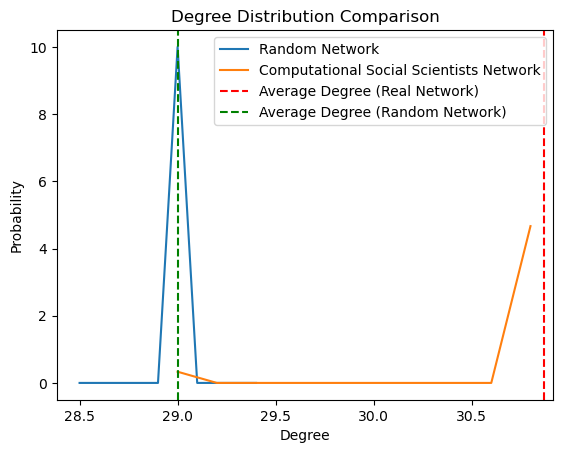

In [11]:
# Get the degree values of the nodes in the random network
random_degree_values = [degree for node, degree in RandomNetwork.degree()]

# Compute the degree distribution using np.histogram
random_hist, random_bins = np.histogram(random_degree_values, bins=10, density=True)

# Get the degree values of the nodes in the Computational Social Scientists network
network_degree_values = [degree for node, degree in Network.degree()]

# Compute the degree distribution using np.histogram
network_hist, network_bins = np.histogram(network_degree_values, bins=10, density=True)

# Plot the degree distributions
plt.plot(random_bins[:-1], random_hist, label='Random Network')
plt.plot(network_bins[:-1], network_hist, label='Computational Social Scientists Network')

# Add vertical lines for average degree
plt.axvline(x=average_degree, color='red', linestyle='--', label='Average Degree (Real Network)')
plt.axvline(x=np.mean(random_degree_values), color='green', linestyle='--', label='Average Degree (Random Network)')


plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution Comparison")
plt.legend()
plt.show()


**Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.**

**What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?**

---

## Part 2 Network Analysis in Computational Social Science


In [12]:
from itertools import combinations
import ast

papers = pd.read_csv('data/papers.csv')

def preprocess_author_ids(row):
    try:
        return ast.literal_eval(row)
    except:
        return []
papers['author_ids'] = papers['author_ids'].apply(preprocess_author_ids)

coauthorship_counts = {}
for _, paper in papers.iterrows():
     for author_pair in combinations(paper['author_ids'], 2):
        # Sort the pair to avoid duplicate entries
        sorted_pair = tuple(sorted(author_pair))
        # Increment the count for this pair
        coauthorship_counts[sorted_pair] = coauthorship_counts.get(sorted_pair, 0) + 1
weighted_edgelist = [(pair[0], pair[1], weight) for pair, weight in coauthorship_counts.items()]

G = nx.Graph()
G.add_weighted_edges_from(weighted_edgelist)

In [14]:
# Adding node attributes
for _, row in authors.iterrows():
    # Node attributes
    node_attrs = {
        'display_name': row['display_name'],
        'country': row['country_code'],
        'citation_count': row['cited_by_count'],
        # Using 'works_count' as a proxy for the first publication year
        'first_publication_year': row['works_count']
    }
    G.add_node(row['id'], **node_attrs)
    
# data = nx.readwrite.json_graph.node_link_data(G)

nx.write_adjlist(G, './data/network1.json')

In [15]:
total_edges = G.number_of_edges()
total_edges

694037

In [16]:
# c = []
# for node in G.nodes(data=True):
#     node_attrs = node[1]  # This is the dictionary of the node's attributes

#     # Access the 'country' attribute
#     c.append(node_attrs.get('country', 'No Country Specified'))

